In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

class DraggablePoints:
    def __init__(self, ax, image, points):
        self.ax = ax
        self.image = image
        self.points = points
        self.draggable_points = []
        self.selected_point = None
        self.offset = (0, 0)
        
        self.setup_plot()

    def setup_plot(self):
        # Display the image
        self.ax.imshow(self.image)

        # Plot the initial points
        for x, y in self.points:
            point, = self.ax.plot(x, y, 'ro', markersize=10)
            self.draggable_points.append(point)

        # Connect the event handlers
        self.cid_click = self.ax.figure.canvas.mpl_connect('button_press_event', self.on_click)
        self.cid_release = self.ax.figure.canvas.mpl_connect('button_release_event', self.on_release)
        self.cid_motion = self.ax.figure.canvas.mpl_connect('motion_notify_event', self.on_motion)

    def on_click(self, event):
        # Check if a point was clicked
        for point in self.draggable_points:
            contains, _ = point.contains(event)
            if contains:
                self.selected_point = point
                self.offset = (point.get_xdata()[0] - event.xdata, point.get_ydata()[0] - event.ydata)
                break

    def on_release(self, event):
        # Release the selected point
        self.selected_point = None

    def on_motion(self, event):
        # If a point is selected, move it
        if self.selected_point is not None:
            new_x = event.xdata + self.offset[0]
            new_y = event.ydata + self.offset[1]
            self.selected_point.set_data(new_x, new_y)
            self.ax.figure.canvas.draw()

def load_points(file_path):
    points = np.loadtxt(file_path, delimiter=',')
    return points

def main():
    image_path = "input.jpg"  # Path to your image
    points_file_path = "cephdata/labels/val/004.txt"  # Path to the text file containing the points
    
    # Load the image
    image = mpimg.imread(image_path)
    
    # Load the points
    points = load_points(points_file_path)
    
    # Create a figure and axes
    fig, ax = plt.subplots()
    
    # Create an instance of DraggablePoints
    dp = DraggablePoints(ax, image, points)
    
    # Show the plot
    plt.show()

if __name__ == "__main__":
    main()


In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np



In [3]:
image_path = "cephdata/images/val/004.bmp"  # Path to your /image
points_file_path = "cephdata/labels/val/004.txt"

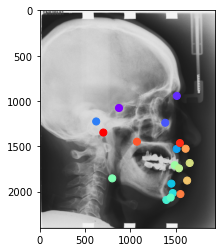

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.cm as cm

def extract_numbers_from_file(file_path):
    try:
        # Open the file in read mode
        with open(file_path, 'r') as file:
            # Read the file content
            content = file.read()
            
            # Extract numbers and convert them to a list of floats
            float_list = [float(number) for number in content.split()]
            arr = np.array(float_list)
            arr_cut = arr[5:]  # Assuming the first 5 numbers are not part of the coordinates
            arr_reshaped = arr_cut.reshape([19, 2])
            
            return arr_reshaped
    
    except FileNotFoundError:
        return "File not found."

def overlay_coordinates_on_image(image_path, coordinates):
    # Load the image
    image = Image.open(image_path)
    img_width, img_height = image.size
    
    # Normalize coordinates (assuming coordinates are in [0,1])
    normalized_coordinates = coordinates * np.array([img_width, img_height])
    
    # Generate a list of unique colors for each point
    colors = cm.rainbow(np.linspace(0, 1, len(coordinates)))
    
    plt.imshow(image)

    # Plot the normalized coordinates with unique colors
    plt.scatter(normalized_coordinates[:, 0], normalized_coordinates[:, 1], c=colors, s=50, marker='o')
    
    # Show the image with overlay
    plt.show()

# Example usage
points_file_path = "cephdata/labels/val/004.txt"
coordinates = extract_numbers_from_file(points_file_path)

image_path = "cephdata/images/val/004.bmp"  # Replace with your image path
overlay_coordinates_on_image(image_path, coordinates)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

class DraggablePoints:
    def __init__(self, ax, image, points):
        self.ax = ax
        self.image = image
        self.points = points
        self.draggable_points = []
        self.selected_point = None
        self.offset = (0, 0)
        
        self.setup_plot()

    def setup_plot(self):
        # Display the image
        self.ax.imshow(self.image)

        # Plot the initial points
        for x, y in self.points:
            point, = self.ax.plot(x, y, 'ro', markersize=10)
            self.draggable_points.append(point)

        # Connect the event handlers
        self.cid_click = self.ax.figure.canvas.mpl_connect('button_press_event', self.on_click)
        self.cid_release = self.ax.figure.canvas.mpl_connect('button_release_event', self.on_release)
        self.cid_motion = self.ax.figure.canvas.mpl_connect('motion_notify_event', self.on_motion)

    def on_click(self, event):
        # Check if a point was clicked
        for point in self.draggable_points:
            contains, _ = point.contains(event)
            if contains:
                self.selected_point = point
                self.offset = (point.get_xdata()[0] - event.xdata, point.get_ydata()[0] - event.ydata)
                break

    def on_release(self, event):
        # Release the selected point
        self.selected_point = None

    def on_motion(self, event):
        # If a point is selected, move it
        if self.selected_point is not None:
            new_x = event.xdata + self.offset[0]
            new_y = event.ydata + self.offset[1]
            self.selected_point.set_data(new_x, new_y)
            self.ax.figure.canvas.draw()

def load_points(file_path):
    points = np.loadtxt(file_path, delimiter=',')
    return points

def main():
    image_path = "input.jpg"  # Path to your image
    points_file_path = "cephdata/labels/val/004.txt"  # Path to the text file containing the points
    
    # Load the image
    image = mpimg.imread(image_path)
    
    # Load the points
    points = load_points(points_file_path)
    
    # Create a figure and axes
    fig, ax = plt.subplots()
    
    # Create an instance of DraggablePoints
    dp = DraggablePoints(ax, image, points)
    
    # Show the plot
    plt.show()

if __name__ == "__main__":
    main()


In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np



In [3]:
image_path = "cephdata/images/val/004.bmp"  # Path to your /image
points_file_path = "cephdata/labels/val/004.txt"

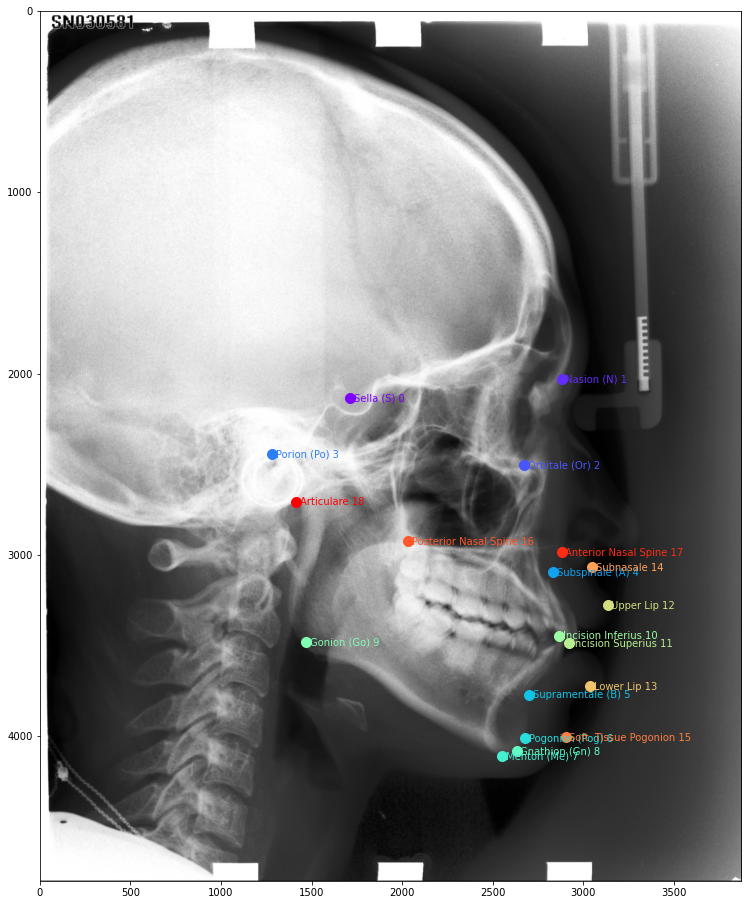

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import matplotlib.cm as cm

def extract_numbers_from_file(file_path):
    try:
        with open(file_path, 'r') as file:
            content = file.read()
            float_list = [float(number) for number in content.split()]
            arr = np.array(float_list)
            arr_cut = arr[0:]  # Assuming the first 5 numbers are not part of the coordinates
            arr_reshaped = arr_cut.reshape([19, 2])
            return arr_reshaped
    except FileNotFoundError:
        return "File not found."

def overlay_coordinates_on_image(image_path, points_dict, scale_factor=2):
    # Load the image
    image = Image.open(image_path)
    
    # Resize the image by the scale factor
    img_width, img_height = image.size
    new_size = (img_width * scale_factor, img_height * scale_factor)
    image_resized = image.resize(new_size, Image.LANCZOS)
    
    # Extract and normalize the coordinates
    coordinates = np.array(list(points_dict.values()))
    normalized_coordinates = coordinates * np.array([new_size[0], new_size[1]])
    
    # Generate a list of unique colors for each point
    colors = cm.rainbow(np.linspace(0, 1, len(coordinates)))
    
    plt.figure(figsize=(16, 16))  # Increase figure size for better visibility
    plt.imshow(image_resized)

    # Adjust marker size and label offset
    marker_size = 100
    label_offset = 10 * scale_factor
    
    # Adjusted font size
    font_size = 10  
    
    # Plot the normalized coordinates with unique colors and labels
    for i, (label, point) in enumerate(points_dict.items()):
        plt.scatter(normalized_coordinates[i, 0], normalized_coordinates[i, 1], color=colors[i], s=marker_size, marker='o')
        plt.text(normalized_coordinates[i, 0] + label_offset, normalized_coordinates[i, 1] + label_offset, label, color=colors[i], fontsize=font_size)
    
    # Show the image with overlay
    plt.show()

# Example usage
series_id = "183"
#points_file_path = f"cephdata/labels/val/{series_id}.txt"
points_file_path = f"./static/uploads/xy.txt"
coordinates = extract_numbers_from_file(points_file_path)

landmarks = [
    "Sella (S)", "Nasion (N)", "Orbitale (Or)", "Porion (Po)", "Subspinale (A)",
    "Supramentale (B)", "Pogonion (Pog)", "Menton (Me)", "Gnathion (Gn)", "Gonion (Go)",
    "Incision Inferius", "Incision Superius", "Upper Lip", "Lower Lip", "Subnasale",
    "Soft  Tissue Pogonion", "Posterior Nasal Spine", "Anterior Nasal Spine", "Articulare"
]

points_dict = {f'{name} {i}': point.tolist() for i, (name, point) in enumerate(zip(landmarks, coordinates))}

#image_path = f"cephdata/images/val/{series_id}.bmp"  # Replace with your image path
image_path = f"./static/uploads/183.jpg"  # Replace with your image path
overlay_coordinates_on_image(image_path, points_dict)


In [85]:
landmarks = [
    "Sella (S)", "Nasion (N)", "Orbitale (Or)", "Porion (Po)", "Subspinale (A)",
    "Supramentale (B)", "Pogonion (Pog)", "Menton (Me)", "Gnathion (Gn)", "Gonion (Go)",
    "Incision Inferius", "Incision Superius", "Upper Lip", "Lower Lip", "Subnasale",
    "Soft  Tissue Pogonion", "Posterior Nasal Spine", "Anterior Nasal Spine", "Articulare"
]

In [83]:
points_dict

{'Sella (S) 0': [0.4522, 0.4487],
 'Nasion (N) 1': [0.7819, 0.3933],
 'Orbitale (Or) 2': [0.7158, 0.5167],
 'Porion (Po) 3': [0.322, 0.5108],
 'Subspinale (A) 4': [0.7809, 0.6371],
 'Supramentale (B) 5': [0.7509, 0.7967],
 'Pogonion (Pog) 6': [0.7587, 0.84],
 'Gnathion (Gn) 7': [0.722, 0.8717],
 'Menton (Me) 8': [0.7468, 0.8608],
 'Gonion (Go) 9': [0.4134, 0.7725],
 'Anterior Nasal Spine (ANS) 10': [0.7705, 0.7117],
 'Posterior Nasal Spine (PNS) 11': [0.7943, 0.7262],
 'Articulare (Ar) 12': [0.8553, 0.7017],
 'Condylion (Co) 13': [0.8408, 0.7825],
 'Basion (Ba) 14': [0.832, 0.6362],
 'Pterygoid Point (Pt) 15': [0.8026, 0.8446],
 'Upper Incisor Tip (U1) 16': [0.5545, 0.6038],
 'Lower Incisor Tip (L1) 17': [0.7995, 0.61],
 'Soft Tissue Pogonion (Pog’) 18': [0.3628, 0.5617]}